In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [44]:
pipes_df = pd.read_csv('dataset/pipes_df.csv')
spills_df = pd.read_csv('dataset/spills_df.csv')

In [45]:
pipes_df.head()

,time,lon_start,lat_start,lon_end,lat_end,name
0,2021-06-04 06:42:19+00:00,73.033226,60.588367,73.044554,60.594281,0_2021_06_04_06_42_19.npy
1,2021-06-09 06:42:19+00:00,73.033226,60.588367,73.044554,60.594281,1_2021_06_09_06_42_19.npy
2,2021-06-11 06:32:21+00:00,73.033226,60.588367,73.044554,60.594281,2_2021_06_11_06_32_21.npy
3,2021-06-14 06:42:20+00:00,73.033226,60.588367,73.044554,60.594281,3_2021_06_14_06_42_20.npy
4,2021-06-26 06:32:22+00:00,73.033226,60.588367,73.044554,60.594281,4_2021_06_26_06_32_22.npy


In [46]:
new_cols = ['band_' + str(i) for i in range(1, 20)]

for col in new_cols:
    pipes_df[f'{col}'] = 0.0
    spills_df[f'{col}'] = 0.0

In [47]:
pipes_df.dtypes

time          object
lon_start    float64
lat_start    float64
lon_end      float64
lat_end      float64
name          object
band_1       float64
band_2       float64
band_3       float64
band_4       float64
band_5       float64
band_6       float64
band_7       float64
band_8       float64
band_9       float64
band_10      float64
band_11      float64
band_12      float64
band_13      float64
band_14      float64
band_15      float64
band_16      float64
band_17      float64
band_18      float64
band_19      float64
dtype: object

In [48]:
folder = 'pipes_frames'
for i in range(len(pipes_df)):
    np_array = np.mean(np.load('dataset/' + folder + '/' + pipes_df.iloc[i, 5]), axis= (0, 1))
    for j in range(19):
        pipes_df.iloc[i, 6+j] = np_array[j]

In [49]:
folder = 'spills_frames'
for i in range(len(spills_df)):
    np_array = np.mean(np.load('dataset/' + folder + '/' + spills_df.iloc[i, 5]), axis= (0, 1))
    for j in range(19):
        spills_df.iloc[i, 6+j] = np_array[j]

In [22]:
len(pipes_df)

23320

In [52]:
len(spills_df)

55429

In [50]:
pipes_df['y'] = 0
spills_df['y'] = 1

In [57]:
len(train_df)

46640

In [179]:
train_df = pd.concat([pipes_df, spills_df[:23320]])

In [180]:
train_df.isna().sum()

time         0
lon_start    0
lat_start    0
lon_end      0
lat_end      0
name         0
band_1       0
band_2       0
band_3       0
band_4       0
band_5       0
band_6       0
band_7       0
band_8       0
band_9       0
band_10      0
band_11      0
band_12      0
band_13      0
band_14      0
band_15      0
band_16      0
band_17      0
band_18      0
band_19      0
y            0
dtype: int64

In [182]:
train_df.sample(5)

,time,lon_start,lat_start,lon_end,lat_end,name,band_1,band_2,band_3,band_4,...,band_11,band_12,band_13,band_14,band_15,band_16,band_17,band_18,band_19,y
338,2017-11-14 06:31:20+00:00,76.828511,62.973044,76.841490,62.978622,338_2017_11_14_06_31_20.npy,5.554585,4.957737,4.387348,4.383430,...,1.000899,1.075346,0.0002,0.000000,0.000000,31.818604,1.0,11.000000,98.966797,1
1964,2017-01-28 06:31:18+00:00,77.796593,61.160410,77.808982,61.165903,1964_2017_01_28_06_31_18.npy,5.948438,5.389093,4.700345,4.884093,...,0.901235,0.948141,0.0002,0.173828,0.000000,23.618652,1.0,10.945801,70.621094,1
17516,2021-09-14 07:22:07+00:00,65.167159,61.238427,65.179470,61.243978,17516_2021_09_14_07_22_07.npy,0.044310,0.182841,0.474609,0.343843,...,1.258765,0.638736,0.0001,0.000977,0.000000,17.293945,1.0,4.047852,0.000000,0
8437,2021-08-08 06:42:21+00:00,72.322506,60.585428,72.333701,60.591401,8437_2021_08_08_06_42_21.npy,0.983284,0.971399,1.094694,0.838801,...,1.553472,0.817796,0.0004,5.156006,1.000000,140.091309,1.0,5.002441,0.000000,0
3200,2021-06-13 07:12:48+00:00,64.681758,59.914256,64.693491,59.919854,3200_2021_06_13_07_12_48.npy,0.481450,0.565567,0.708040,0.572855,...,1.457682,0.867603,0.0001,0.100830,0.937744,106.519531,1.0,10.000000,0.000000,0


In [183]:
train_df = train_df.drop(columns=['time', 'lon_start', 'lat_start', 'lon_end', 'lat_end', 'name'])

In [184]:
train_df['ndvi'] = (train_df['band_8'] - train_df['band_4'])/(train_df['band_8'] + train_df['band_4'])

In [ ]:
train_df = train_df.dropna()

In [186]:
numeric_list = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_list] = train_df[numeric_list].astype(np.float32)

In [187]:
train_df.dtypes

band_1     float32
band_2     float32
band_3     float32
band_4     float32
band_5     float32
band_6     float32
band_7     float32
band_8     float32
band_9     float32
band_10    float32
band_11    float32
band_12    float32
band_13    float32
band_14    float32
band_15    float32
band_16    float32
band_17    float32
band_18    float32
band_19    float32
y          float32
ndvi       float32
dtype: object

In [188]:
train_dataset = train_df.sample(frac=0.9, random_state=0)
test_dataset = train_df.drop(train_dataset.index)

In [189]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')

In [190]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)

In [191]:
normalizer.adapt(np.array(train_features))

In [198]:
normalizer

In [192]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[ 0.83  0.83  1.09  1.17  1.65  2.31  2.52  2.73  2.78  2.92  2.37  1.87
   0.    0.83  0.68 61.7   1.    4.74  0.    0.4 ]]

Normalized: [[-0.51 -0.53 -0.47 -0.42 -0.4  -0.43 -0.42 -0.41 -0.37 -0.39  0.99  1.
  -0.86 -0.32  1.44  0.24  0.09 -0.66 -0.57  0.02]]


In [193]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1, activation=tf.nn.sigmoid)
])

In [194]:
model.predict(train_features[:10])

array([[0.4446841 ],
       [0.6397044 ],
       [0.92892766],
       [0.4084771 ],
       [0.5577599 ],
       [0.45085368],
       [0.32913262],
       [0.22315921],
       [0.30762565],
       [0.43017557]], dtype=float32)

In [195]:
model.layers[1].kernel

<tf.Variable 'dense_13/kernel:0' shape=(20, 1) dtype=float32, numpy=
array([[ 0.41795838],
       [ 0.1542632 ],
       [ 0.12030333],
       [ 0.3172319 ],
       [ 0.3853922 ],
       [ 0.26185203],
       [ 0.08020937],
       [ 0.09313154],
       [-0.26183814],
       [ 0.03714484],
       [ 0.5172735 ],
       [-0.28582034],
       [-0.40068835],
       [-0.40090394],
       [-0.3877204 ],
       [ 0.3977028 ],
       [-0.2073951 ],
       [-0.30394065],
       [-0.18491915],
       [-0.11327487]], dtype=float32)>

In [196]:
model.compile(optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy'])

In [197]:
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
1047/1047 [==============================] - 4s 3ms/step - loss: 0.5264 - accuracy: 0.7288 - val_loss: 0.5100 - val_accuracy: 0.7372
Epoch 2/100
1047/1047 [==============================] - 3s 3ms/step - loss: 0.4903 - accuracy: 0.7526 - val_loss: 0.5001 - val_accuracy: 0.7449
Epoch 3/100
1047/1047 [==============================] - 3s 3ms/step - loss: 0.4819 - accuracy: 0.7574 - val_loss: 0.4952 - val_accuracy: 0.7468
Epoch 4/100
1047/1047 [==============================] - 3s 3ms/step - loss: 0.4774 - accuracy: 0.7598 - val_loss: 0.4925 - val_accuracy: 0.7490
Epoch 5/100
1047/1047 [==============================] - 3s 3ms/step - loss: 0.4744 - accuracy: 0.7616 - val_loss: 0.4905 - val_accuracy: 0.7498
Epoch 6/100
1047/1047 [==============================] - 3s 3ms/step - loss: 0.4722 - accuracy: 0.7624 - val_loss: 0.4890 - val_accuracy: 0.7497
Epoch 7/100
1047/1047 [==============================] - 3s 3ms/step - loss: 0.4703 - accuracy: 0.7636 - val_loss: 0.4873 - val_ac

In [199]:
result = pd.DataFrame(np.array(model.layers[1].kernel))

In [202]:
result['index'] = [i for i in range(1, 21)]

In [203]:
result = result.set_index('index')

In [204]:
result

,0
index,
1,-1.980254
2,-0.642318
3,-0.733566
4,0.775070
5,2.279209
6,0.714435
7,0.381890
8,-0.149938
9,-0.131994


In [ ]:
B01 Coastal aerosol - 1.72,
B04 Red - 1.494937,
B05 Vegetation red edge - 2.550103,
B08 NIR - -1.136251
B09 Water vapour - -1.161327
B10 SWIR Cirrus - -1.052148
B11 SWIR - 2.098709
CLP - -1.277699

In [130]:
import matplotlib.pyplot as plt

In [131]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.ylim([0, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [ACC]')
    plt.legend()
    plt.grid(True)

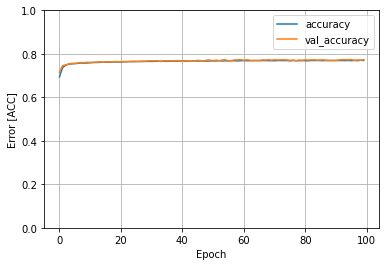

In [132]:
plot_loss(history)

In [142]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer='sgd',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [143]:
dnn_model = build_and_compile_model(normalizer)

In [145]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4507 - accuracy: 0.7719 - val_loss: 0.4451 - val_accuracy: 0.7788
Epoch 2/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4430 - accuracy: 0.7789 - val_loss: 0.4373 - val_accuracy: 0.7857
Epoch 3/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4358 - accuracy: 0.7867 - val_loss: 0.4312 - val_accuracy: 0.7919
Epoch 4/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4293 - accuracy: 0.7926 - val_loss: 0.4258 - val_accuracy: 0.8010
Epoch 5/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4223 - accuracy: 0.8001 - val_loss: 0.4187 - val_accuracy: 0.8036
Epoch 6/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4154 - accuracy: 0.8067 - val_loss: 0.4108 - val_accuracy: 0.8106
Epoch 7/100
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4081 - accuracy: 0.8151 - val_loss: 0.4052 - val_ac